In [1]:
from math import *
import pylab
import numpy as np
from numpy import random as nrandom
from PIL import Image
import matplotlib.patches as mpatches

import torch
import torch.nn
import torch.nn.functional as nn
import torch.autograd as autograd
import torch.optim as optim
import torch.backends.cudnn as cudnn
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
from torch.autograd import Variable
import pylab

from itertools import chain

(80000, 3)


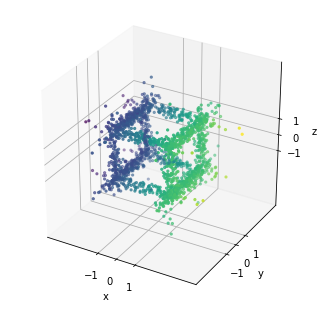

In [2]:

c1 = [0,1.5, -1.5]
c2 = [-1.5,0, -1.5]
c3 = [1.5,0 ,-1.5]
c4 = [0,-1.5, -1.5]

v1 = [[1.5,0, 0],
      [0,0.025, 0],
      [0,0,0.025]]
v2 = [[0.025,0, 0],
      [0,1.5, 0],
      [0,0,0.025]]
v3 = [[0.025,0, 0],
      [0,1.5, 0],
      [0,0,0.025]]
v4 = [[1.5,0, 0],
      [0,0.025, 0],
      [0,0,0.025]]

c5 = [1.5,1.5, 0]
c6 = [1.5,0, 1.5]
c7 = [1.5,-1.5 ,0]
c8 = [1.5,0, -1.5]


v5 = [[0.025,0, 0],
      [0,0.025, 0],
      [0,0,1.5]]
v6 = [[0.025,0, 0],
      [0,1.5, 0],
      [0,0,0.025]]
v7 = [[0.025,0, 0],
      [0,0.025, 0],
      [0,0,1.5]]
v8 = [[0.025,0, 0],
      [0,1.5, 0],
      [0,0,0.025]]

c9 = [0,1.5, 1.5]
c10 = [-1.5,0, 1.5]
c11 = [1.5,0 ,1.5]
c12 = [0,-1.5, 1.5]


c13 = [-1.5,1.5, 0]
c14 = [-1.5,0, 1.5]
c15 = [-1.5,-1.5 ,0]
c16 = [-1.5,0, -1.5]





x1,y1,z1 = np.random.multivariate_normal(c1,v1,5000).T
x2,y2,z2 = np.random.multivariate_normal(c2,v2,5000).T
x3,y3,z3 = np.random.multivariate_normal(c3,v3,5000).T
x4,y4,z4 = np.random.multivariate_normal(c4,v4,5000).T
x5,y5,z5 = np.random.multivariate_normal(c5,v5,5000).T
x6,y6,z6 = np.random.multivariate_normal(c6,v6,5000).T
x7,y7,z7 = np.random.multivariate_normal(c7,v7,5000).T
x8,y8,z8 = np.random.multivariate_normal(c8,v8,5000).T
x9,y9,z9 = np.random.multivariate_normal(c9,v1,5000).T
x10,y10,z10 = np.random.multivariate_normal(c10,v2,5000).T
x11,y11,z11 = np.random.multivariate_normal(c11,v3,5000).T
x12,y12,z12 = np.random.multivariate_normal(c12,v4,5000).T
x13,y13,z13 = np.random.multivariate_normal(c13,v5,5000).T
x14,y14,z14 = np.random.multivariate_normal(c14,v6,5000).T
x15,y15,z15 = np.random.multivariate_normal(c15,v7,5000).T
x16,y16,z16 = np.random.multivariate_normal(c16,v8,5000).T


X1 = np.stack((x1,y1,z1)).T
X2 = np.stack((x2,y2,z2)).T
X3 = np.stack((x3,y3,z3)).T
X4 = np.stack((x4,y4,z4)).T
X5 = np.stack((x5,y5,z5)).T
X6 = np.stack((x6,y6,z6)).T
X7 = np.stack((x7,y7,z7)).T
X8 = np.stack((x8,y8,z8)).T
X9 = np.stack((x9,y9,z9)).T
X10 = np.stack((x10,y10,z10)).T
X11 = np.stack((x11,y11,z11)).T
X12 = np.stack((x12,y12,z12)).T
X13 = np.stack((x13,y13,z13)).T
X14 = np.stack((x14,y14,z14)).T
X15 = np.stack((x15,y15,z15)).T
X16 = np.stack((x16,y16,z16)).T


toy_data = np.concatenate((X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16))
np.random.shuffle(toy_data)

print(toy_data.shape)

fig = pylab.figure(figsize=(12,12))
ax = fig.add_subplot(2,2,1, projection='3d')
ax.scatter3D(toy_data[:2000,0], toy_data[:2000,1], toy_data[:2000,2], c=toy_data[:2000,0], marker='.')
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
pylab.show()


In [3]:
def plot_z(z_batch, dir=None, filename="z"):
	if dir is None:
		raise Exception()
	try:
		os.mkdir(dir)
	except:
		pass
	fig = pylab.figure(figsize=(12,12))
	ax = fig.add_subplot(2,2,1, projection='3d')
	colors = ["#2103c8", "#0e960e", "#e40402","#05aaa8","#ac02ab","#aba808","#151515","#94a169", "#bec9cd", "#6a6551"]
	for n in range(z_batch.shape[0]):
		ax.scatter3D(z_batch[:2000,0], z_batch[:2000,1], z_batch[:2000,2], c=z_batch[:2000,0], marker='.')
		ax.set_xticks([-1, 0, 1])
		ax.set_yticks([-1, 0, 1])
		ax.set_zticks([-1, 0, 1])
	ax.set_xlabel('x')
	ax.set_ylabel('y')
	ax.set_zlabel('z')
	pylab.savefig("{}/{}.png".format(dir, filename))
	pylab.close()

In [4]:
mb_size = 512 	#batch size
x_dim = 1	#data dimension
X_dim = 3	#augmented data dimension
j_dim = 3	#joint data dimension
h_dim = 1024	#hidden layer dimension
lr = 1*1e-4	#learning rate
noise = 1	#noise on samples
n_critic = 8	#inner loop nbr of dircriminator

total_data_points = 5000 * 16

dtype = torch.cuda.FloatTensor
epochs = 100

In [5]:

Generator1 = torch.nn.Sequential(
	torch.nn.Linear(X_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, x_dim),
)

Generator2 = torch.nn.Sequential(
	torch.nn.Linear(X_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, x_dim),
)

Generator3 = torch.nn.Sequential(
	torch.nn.Linear(X_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, x_dim),
)

Discriminator1 = torch.nn.Sequential(
	torch.nn.Linear(j_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, 1),
	torch.nn.Sigmoid(),
)

Classifier = torch.nn.Sequential(
	torch.nn.Linear(j_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, h_dim),
	torch.nn.LeakyReLU(),
	torch.nn.Linear(h_dim, 3),
	torch.nn.Sigmoid(),
)


Generator1.cuda()
Generator2.cuda()
Generator3.cuda()
Discriminator1.cuda()
Classifier.cuda()


def reset_grad():
	Generator1.zero_grad()
	Generator2.zero_grad()
	Generator3.zero_grad()
	Discriminator1.zero_grad()
	Classifier.zero_grad()


def getMinibatchIDs(n, minibatch_size, shuffle=True):
    idx_list = np.arange(n, dtype="int32")

    if shuffle:
        np.random.shuffle(idx_list)

    minibatches = []
    minibatch_start = 0
    for i in range(n // minibatch_size):
        minibatches.append(idx_list[minibatch_start:
                                    minibatch_start + minibatch_size])
        minibatch_start += minibatch_size

    if (minibatch_start != n):
        # Make a minibatch out of what is left
        minibatches.append(idx_list[minibatch_start:])

    return zip(range(len(minibatches)), minibatches)




In [6]:
## binary cross entropy loss
bce = torch.nn.CrossEntropyLoss().cuda()

G_solver = optim.Adam(chain(Generator1.parameters(),Generator2.parameters(),Generator3.parameters()), lr=lr)
D_solver = optim.Adam(chain(Discriminator1.parameters(),Classifier.parameters(),Discriminator3.parameters(),Discriminator4.parameters()), lr=lr)


real_label = 1
fake_label = 0
real_tensor = Variable(torch.FloatTensor(mb_size)).cuda()
_ = real_tensor.data.fill_(real_label)
real_tensor = real_tensor.reshape((real_tensor.shape[0],1))
print(real_tensor.shape)

paired_real_tensor = Variable(torch.FloatTensor(mb_size)).cuda()
_ = paired_real_tensor.data.fill_(real_label)
paired_real_tensor = paired_real_tensor.reshape((paired_real_tensor.shape[0],1))
print(paired_real_tensor.shape)

fake_tensor = Variable(torch.FloatTensor(mb_size)).cuda()
_ = fake_tensor.data.fill_(fake_label)
fake_tensor = fake_tensor.reshape((fake_tensor.shape[0],1))
print(fake_tensor.shape)

xz_class = Variable(torch.FloatTensor(mb_size)).cuda()
xz_class = xz_class.data.fill_(np.array([1,0,1]))

yz_class = Variable(torch.FloatTensor(mb_size)).cuda()
yz_class = yz_class.data.fill_(np.array([0,1,1]))

xy_class = Variable(torch.FloatTensor(mb_size)).cuda()
xy_class = xy_class.data.fill_(np.array([1,1,0]))


torch.Size([512, 1])
torch.Size([512, 1])
torch.Size([512, 1])


In [ ]:

for it in range(0,epochs):
	kf = list(getMinibatchIDs(total_data_points, mb_size))
	for i in range(int(total_data_points/mb_size)):

		critic = n_critic
		## gaussian 1 and 2 are bivariate gaussian noise used for modelling p(x|y) and p(y|x)
		gaussian1 = np.random.normal(0, noise, (mb_size,x_dim))
		gaussian1 = Variable(torch.from_numpy(gaussian1).cuda())
		gaussian1 = gaussian1.float()


		gaussian2 = np.random.normal(0, noise, (mb_size,x_dim))
		gaussian2 = Variable(torch.from_numpy(gaussian2).cuda())
		gaussian2 = gaussian2.float()

		gaussian3 = np.random.normal(0, noise, (mb_size,x_dim))
		gaussian3 = Variable(torch.from_numpy(gaussian3).cuda())
		gaussian3 = gaussian3.float()

		xCoord = toy_data[kf[i][1]][:,0].reshape((-1,1))
		xCoord = Variable(torch.from_numpy(xCoord).cuda())
		xCoord = xCoord.float()


		yCoord = toy_data[kf[i][1]][:,1].reshape((-1,1))
		yCoord = Variable(torch.from_numpy(yCoord).cuda())
		yCoord = yCoord.float()
		


		zCoord = toy_data[kf[i][1]][:,2].reshape((-1,1))
		zCoord = Variable(torch.from_numpy(zCoord).cuda())
		zCoord = zCoord.float()

		xzCoordWithNoise = torch.cat((gaussian1,xCoord, zCoord),1)
		yxCoordWithNoise = torch.cat((gaussian2,yCoord, xCoord),1)
		zyCoordWithNoise = torch.cat((gaussian3,zCoord, yCoord),1)
		
		combined_input_coords   = torch.cat((xCoord,yCoord,zCoord),1)
		for _ in range(critic):
		# Sample data
			reset_grad()
			# xx -> y
			G1Prediction = Generator1(xzCoordWithNoise).detach()
			# yx -> z
			G2Prediction = Generator2(yxCoordWithNoise).detach()
			# zy -> x
			G3Prediction = Generator2(zyCoordWithNoise).detach()

			FakeYRealXZ = torch.cat((xCoord,G1Prediction,zCoord),1)
			FakeZRealYX = torch.cat((xCoord,yCoord,G2Prediction),1)
			FakeXRealZY = torch.cat((G3Prediction,yCoord,zCoord),1)
	 
			D1RealLoss = bce(Discriminator1(combined_input_coords), paired_real_tensor)
			D1FakeLoss1 = bce(Discriminator1(FakeYRealXZ), fake_tensor)
			D1FakeLoss2 = bce(Discriminator1(FakeZRealYX), fake_tensor)
			D1FakeLoss3 = bce(Discriminator1(FakeXRealZY), fake_tensor)
			#D2 -> X
			D2ClassifyZloss = bce(Classifier(FakeZRealYX), xy_class)
			D2ClassifyYloss = bce(Classifier(FakeYRealXZ), xz_class)
			D2ClassifyXloss = bce(Classifier(FakeXRealZY), yz_class)


			D1Loss = D1RealLoss + D1FakeLoss1 + D1FakeLoss2 + D1FakeLoss3
			D2Loss = D2ClassifyZloss + D2ClassifyYloss + D2ClassifyXloss

			totalLoss = D1Loss + D2Loss

			totalLoss.backward()

			D_solver.step()

			# Housekeeping - reset gradient
			reset_grad()

		# Generator forward-loss-backward-update
		G1Prediction = Generator1(xzCoordWithNoise)
		G2Prediction = Generator2(yxCoordWithNoise)
		G2Prediction = Generator2(zyCoordWithNoise)
		FakeYRealXZ = torch.cat((xCoord,G1Prediction,zCoord),1)
		FakeZRealYX = torch.cat((xCoord,yCoord,G2Prediction),1)
		FakeXRealZY = torch.cat((G3Prediction,yCoord,zCoord),1)

		G1PredLoss = bce(Discriminator1(FakeYRealXZ), real_tensor) + bce(Classifier(FakeYRealXZ), xz_class) 
		G2PredLoss = bce(Discriminator1(FakeZRealYX), real_tensor) + bce(Classifier(FakeZRealYX), xy_class) 
		G3PredLoss = bce(Discriminator1(FakeXRealZY), real_tensor) + bce(Classifier(FakeXRealZY), yz_class) 

		totalGanLoss = G1PredLoss + G2PredLoss + G3PredLoss
		totalGanLoss.backward()
		G_solver.step()

		# Housekeeping - reset gradient
		reset_grad()


	# Print and plot every now and then
	print('Iter-{}; D_loss: {:.2f},{:.2f}; Gen_loss: {:.2f},{:.2f},{:.2f}'
	      	.format(it, D1Loss.item(), D2Loss.item(),G1PredLoss.item(),G2PredLoss.item(),G2PredLoss.item()))
	sample_x_real = combined_input_coords.cpu().data.numpy()
	plot_z(sample_x_real,'./quadGAN','real_samples')
	sample_XZy = FakeYRealXZ.cpu().data.numpy()
	sample_YXz = FakeZRealYX.cpu().data.numpy()
	sample_ZYx = FakeXRealZY.cpu().data.numpy()
	plot_z(sample_XZy,'./quadGAN','FakeYRealXZ'+str(it))
	plot_z(sample_YXz,'./quadGAN','FakeZRealYX'+str(it))
	plot_z(sample_ZYx,'./quadGAN','FakeXRealZY'+str(it))

Iter-0; D_loss: 3.740870952606201; Gen_loss: 24.524412155151367
